In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('covid.csv')

In [4]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [5]:
df.dtypes

Rank                         int64
NCT Number                  object
Title                       object
Acronym                     object
Status                      object
Study Results               object
Conditions                  object
Interventions               object
Outcome Measures            object
Sponsor/Collaborators       object
Gender                      object
Age                         object
Phases                      object
Enrollment                 float64
Funded Bys                  object
Study Type                  object
Study Designs               object
Other IDs                   object
Start Date                  object
Primary Completion Date     object
Completion Date             object
First Posted                object
Results First Posted        object
Last Update Posted          object
Locations                   object
Study Documents             object
URL                         object
dtype: object

In [6]:
df.shape

(5783, 27)

In [7]:
df_con = df[['Conditions']].value_counts()
df_con.head(50)

Conditions                                     
COVID-19                                           720
Covid19                                            657
COVID                                               95
Covid-19                                            88
SARS-CoV-2                                          52
Coronavirus Infection                               51
Coronavirus                                         47
COVID 19                                            46
COVID19                                             45
Corona Virus Infection                              38
Sars-CoV2                                           33
SARS-CoV-2 Infection                                31
COVID-19 Pneumonia                                  30
COVID-19 Infection                                  27
SARS-CoV Infection                                  25
Covid19|SARS-CoV Infection                          23
SARS-CoV 2                                          21
COVID-19|SARS-CoV

In [8]:
df['Conditions'] = df['Conditions'].str.lower()
df[['Conditions']].value_counts()

Conditions                                       
covid-19                                             809
covid19                                              708
covid                                                 95
covid 19                                              55
sars-cov-2                                            53
                                                    ... 
covid19|ards|hypoxia|cytokine storm                    1
covid19|ards|pneumonia, viral                          1
covid19|ards|pneumonia, viral|computed tomography      1
covid19|ards|respiratory failure                       1
yoga                                                   1
Name: count, Length: 3001, dtype: int64

In [9]:
df['Conditions']=df['Conditions'].str.replace("-","")
df[['Conditions']].value_counts().head(20)

Conditions                
covid19                       1517
covid                           95
sarscov2                        94
covid 19                        55
coronavirus infection           51
coronavirus                     47
covid19|sarscov2                43
covid19 pneumonia               41
corona virus infection          38
sarscov2 infection              35
sarscov2|covid19                34
covid19 infection               30
sarscov infection               25
covid19|sarscov infection       25
sarscov 2                       21
coronavirus infections          19
healthy                         18
covid19|sarscov2 infection      17
coronavirus disease 2019        16
covid19|sarscov 2               16
Name: count, dtype: int64

In [10]:
df['Conditions']=df['Conditions'].str.replace("sarscov2,viral","sarscov2",case=False)
df[['Conditions']].value_counts()

Conditions                                        
covid19                                               1517
covid                                                   95
sarscov2                                                94
covid 19                                                55
coronavirus infection                                   51
                                                      ... 
covid19|immunodeficiency|old age; debility               1
covid19|infection viral|ct scan                          1
covid19|infectious disease                               1
covid19|infectious disease|death|sarscov infection       1
yoga                                                     1
Name: count, Length: 2930, dtype: int64

In [17]:
df['Conditions'] = df['Conditions'].str.replace("COVID 19 ","COVID-19")

In [18]:
df['Status'].value_counts()

Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64

In [19]:
#What is the average enrollment for each status?

df.loc[1:5,['Status','Enrollment']]

,Status,Enrollment
1,Not yet recruiting,60.0
2,Recruiting,500.0
3,"Active, not recruiting",2500.0
4,Recruiting,50.0
5,Enrolling by invitation,10.0


In [20]:
df.dropna(subset=['Enrollment'],inplace=True)
df.shape

(5749, 27)

In [21]:
average_enrollment = df.groupby('Status')['Enrollment'].mean().reset_index()
average_enrollment

,Status,Enrollment
0,"Active, not recruiting",60754.117871
1,Completed,27826.696585
2,Enrolling by invitation,14319.624309
3,Not yet recruiting,11579.353586
4,Recruiting,10894.446346
5,Suspended,2138.222222
6,Terminated,74.770270
7,Withdrawn,0.000000


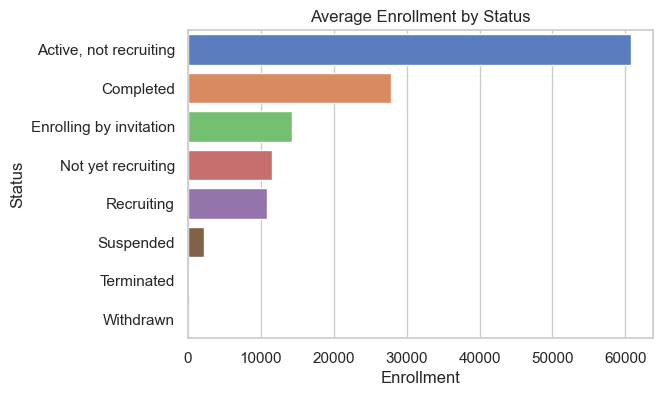

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Create a bar plot for average enrollment by status.
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x='Enrollment', y='Status', data=average_enrollment, errorbar=None, palette='muted')

# Set the title of the plot.
plt.title('Average Enrollment by Status')

# Show the plot.
plt.show()


In [23]:
#How many studies are there for each phase of the trial?
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [24]:
df.loc[1:10,['Phases','Study Type']]

,Phases,Study Type
1,Phase 1|Phase 2,Interventional
2,NaN,Observational
3,NaN,Observational
4,NaN,Observational
5,Early Phase 1,Interventional
6,Not Applicable,Interventional
7,NaN,Observational
8,Not Applicable,Interventional
9,Phase 2|Phase 3,Interventional
10,Early Phase 1,Interventional


In [25]:
df['Phases'].isnull().sum()

2427

In [26]:
df['Phases'].value_counts()

Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64

In [27]:
df[['Phases']].describe()

,Phases
count,3322
unique,8
top,Not Applicable
freq,1354


In [28]:
phases_mode = df['Phases'].mode()[0]
df['Phases'] = df['Phases'].fillna(phases_mode)

In [29]:
df[['Study Type']].describe()

,Study Type
count,5749
unique,2
top,Interventional
freq,3322


In [30]:
#How many studies are there for each phase of the trial?
trail_per_each_study = df.groupby('Phases')['Study Type'].count().reset_index()
trail_per_each_study

,Phases,Study Type
0,Early Phase 1,46
1,Not Applicable,3781
2,Phase 1,234
3,Phase 1|Phase 2,192
4,Phase 2,685
5,Phase 2|Phase 3,200
6,Phase 3,450
7,Phase 4,161


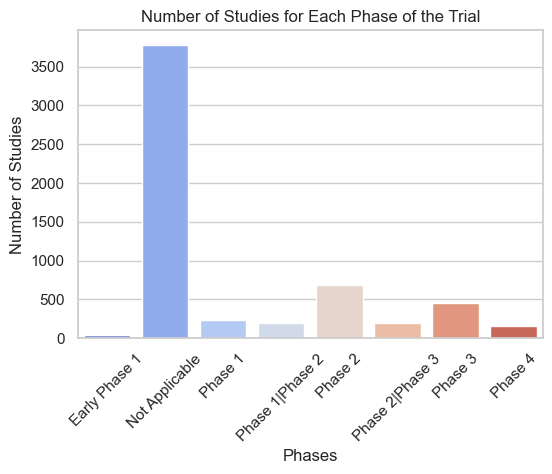

In [31]:
import seaborn as sns

# Setting the style
sns.set(style="whitegrid")

# Creating the plot with Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Phases', y='Study Type', data=trail_per_each_study, palette='coolwarm')

plt.xlabel('Phases')
plt.ylabel('Number of Studies')
plt.title('Number of Studies for Each Phase of the Trial')
plt.xticks(rotation=45)

plt.show()


In [32]:
df['Gender'].value_counts()

Gender
All       5535
Female     162
Male        44
Name: count, dtype: int64

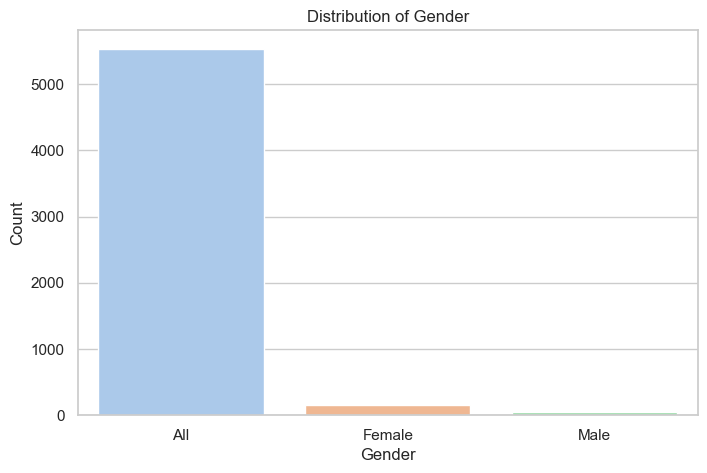

In [33]:
#What is the average enrollment for studies grouped by gender?


plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [34]:
average_enrollment_by_gender = df.groupby('Gender')['Enrollment'].mean().reset_index()
average_enrollment_by_gender

,Gender,Enrollment
0,All,18984.795122
1,Female,1365.456790
2,Male,260.886364


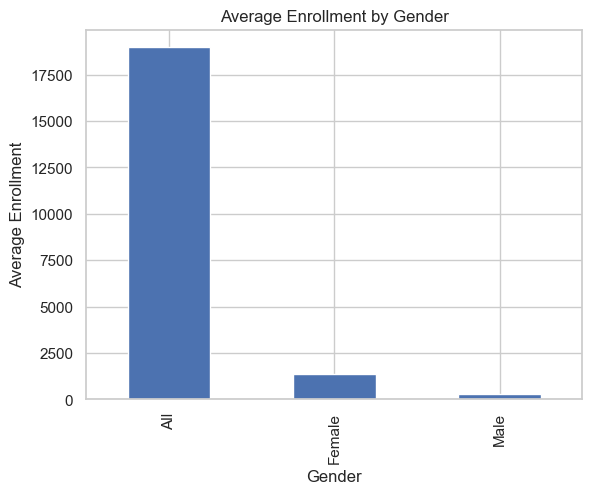

In [35]:
# Create a bar chart
average_enrollment_by_gender.plot(kind='bar', x='Gender', y='Enrollment', legend=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Enrollment')
plt.title('Average Enrollment by Gender')

# Show the plot
plt.show()

In [36]:
#What is the earliest start date for each study type?
df['Start Date'].info()


<class 'pandas.core.series.Series'>
Index: 5749 entries, 0 to 5782
Series name: Start Date
Non-Null Count  Dtype         
--------------  -----         
5263 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 218.9 KB


In [37]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

In [39]:
earliest_study_type = df.groupby('Study Type')['Start Date'].min().reset_index()
earliest_study_type

,Study Type,Start Date
0,Interventional,2011-02-02
1,Observational,1998-01-01


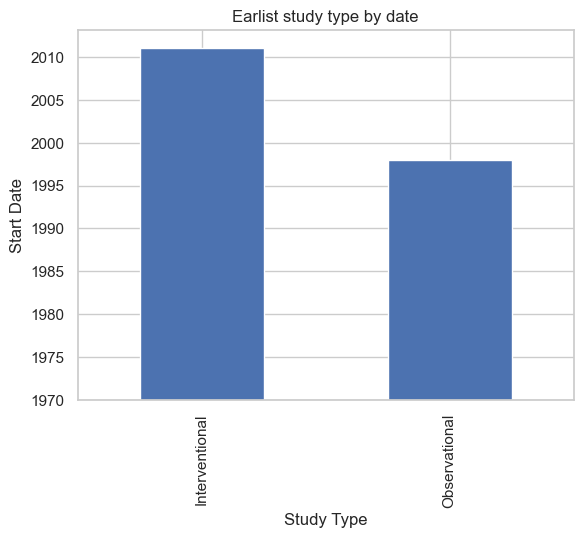

In [44]:
# Create a bar chart
earliest_study_type.plot(kind='bar', x='Study Type', y='Start Date', legend=False)

# Add labels and title
plt.xlabel('Study Type')
plt.ylabel('Start Date')
plt.title('Earlist study type by date')

# Show the plot
plt.show()

In [49]:
#What is the distribution of statuses in the dataset?
dis = df[['Status']].value_counts()

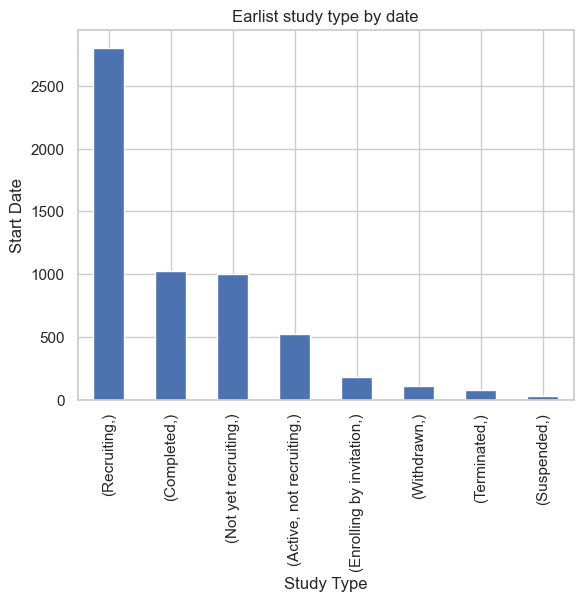

In [50]:
# Create a bar chart
dis.plot(kind='bar', x='Status' ,legend=False)

# Add labels and title
plt.xlabel('Study Type')
plt.ylabel('Start Date')
plt.title('Earlist study type by date')

# Show the plot
plt.show()